In [1]:
# Plotting notebook for the project
# Imports
import argparse
import os
import sys
import glob
import re

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from datetime import datetime
import scipy.stats as stats

# Local imports
sys.path.append('/home/users/benhutch/skill-maps')
import dictionaries as dic
import functions as fnc

In [2]:
# for the GIF plots
!pip install Pillow
from PIL import Image

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Set up the arguments to be used
# Defined globally in this notebook
variable = "psl"
region = "north-atlantic"
season = "DJFM"
forecast_range = "2-9"

In [4]:
# Load the model data
datasets = fnc.load_data(dic.base_dir, dic.models, variable, region, forecast_range, season)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/CESM1-1-CAM5-CMIP5/north-atlantic/years_2-9/DJFM/outputs/mergetime/*.nc
Files for CESM1-1-CAM5-CMIP5: ['/home/users/benhutch/skill-maps-processed-data/psl/CESM1-1-CAM5-CMIP5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CESM1-1-CAM5-CMIP5_psl_north-atlantic_2-9_DJFM-r21i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CESM1-1-CAM5-CMIP5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CESM1-1-CAM5-CMIP5_psl_north-atlantic_2-9_DJFM-r23i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CESM1-1-CAM5-CMIP5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CESM1-1-CAM5-CMIP5_psl_north-atlantic_2-9_DJFM-r33i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CESM1-1-CAM5-CMIP5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CESM1-1-CAM5-CMIP5_psl_north-atlantic_2-9_DJFM-r11i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CESM1-1-CAM5-CMIP5/nor

In [5]:
# load the obs dataset manually
obs_manual = xr.open_dataset("/home/users/benhutch/ERA5_psl/long-ERA5-full-north-atlantic.nc", chunks={"time": 50})

In [6]:
obs_manual

<xarray.Dataset>
Dimensions:  (time: 252, lon: 48, lat: 24)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2022-12-01
  * lon      (lon) float64 -80.0 -77.5 -75.0 -72.5 -70.0 ... 30.0 32.5 35.0 37.5
  * lat      (lat) float64 20.0 22.5 25.0 27.5 30.0 ... 67.5 70.0 72.5 75.0 77.5
Data variables:
    var151   (time, lat, lon) float32 dask.array<chunksize=(50, 24, 48), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Wed Jul 26 09:49:53 2023: cdo remapbil,/home/users/benhutch...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

(252, 24, 48)
lons: <xarray.DataArray 'lon' (lon: 48)>
array([-80. , -77.5, -75. , -72.5, -70. , -67.5, -65. , -62.5, -60. , -57.5,
       -55. , -52.5, -50. , -47.5, -45. , -42.5, -40. , -37.5, -35. , -32.5,
       -30. , -27.5, -25. , -22.5, -20. , -17.5, -15. , -12.5, -10. ,  -7.5,
        -5. ,  -2.5,   0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,
        20. ,  22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5])
Coordinates:
  * lon      (lon) float64 -80.0 -77.5 -75.0 -72.5 -70.0 ... 30.0 32.5 35.0 37.5
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X
lats: <xarray.DataArray 'lat' (lat: 24)>
array([20. , 22.5, 25. , 27.5, 30. , 32.5, 35. , 37.5, 40. , 42.5, 45. , 47.5,
       50. , 52.5, 55. , 57.5, 60. , 62.5, 65. , 67.5, 70. , 72.5, 75. , 77.5])
Coordinates:
  * lat      (lat) float64 20.0 22.5 25.0 27.5 30.0 ... 67.5 70.0 72.5 75.0 77.5
Attributes:
    standard_name:  latitude
    long_name:   

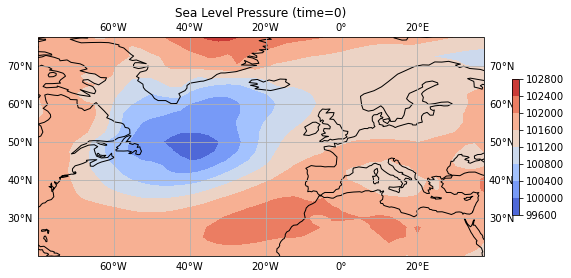

In [7]:
# Select the first time step
timestep = 0

# Extract the sea level pressure data for the first time step
slp = obs_manual['var151'].values

print(np.shape(slp))

# Set up the figure
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot the sea level pressure data
c = ax.contourf(obs_manual['lon'], obs_manual['lat'], slp[0,:,:] , transform=ccrs.PlateCarree(), cmap='coolwarm')

lons = obs_manual['lon']
lats = obs_manual['lat']

print("lons:", lons)
print("lats:", lats)

# Add coastlines and gridlines to the plot
ax.coastlines()
ax.gridlines(draw_labels=True)

# Add a colorbar to the plot
cbar = fig.colorbar(c, ax=ax, shrink=0.5)

# Set the title of the plot
ax.set_title(f"Sea Level Pressure (time={timestep})")

# Show the plot
plt.show()

In [8]:
obs_manual

<xarray.Dataset>
Dimensions:  (time: 252, lon: 48, lat: 24)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2022-12-01
  * lon      (lon) float64 -80.0 -77.5 -75.0 -72.5 -70.0 ... 30.0 32.5 35.0 37.5
  * lat      (lat) float64 20.0 22.5 25.0 27.5 30.0 ... 67.5 70.0 72.5 75.0 77.5
Data variables:
    var151   (time, lat, lon) float32 dask.array<chunksize=(50, 24, 48), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Wed Jul 26 09:49:53 2023: cdo remapbil,/home/users/benhutch...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [9]:
# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

Dataset type: <class 'dict'>
Variable data values:  [[[-2.88593750e+01 -3.30859375e+01 -4.00859375e+01 ... -9.45781250e+01
   -8.23828125e+01 -7.88671875e+01]
  [-2.58593750e+01 -3.74453125e+01 -4.52734375e+01 ... -1.00015625e+02
   -9.10703125e+01 -8.00234375e+01]
  [-2.39921875e+01 -3.90312500e+01 -5.01328125e+01 ... -1.03421875e+02
   -9.68281250e+01 -8.45390625e+01]
  ...
  [ 6.10468750e+01  6.16250000e+01  6.44296875e+01 ...  6.35398438e+02
    6.55898438e+02  6.72859375e+02]
  [ 5.31406250e+01  5.13203125e+01  5.64453125e+01 ...  6.55171875e+02
    6.72960938e+02  6.87375000e+02]
  [ 3.92656250e+01  4.63828125e+01  3.88515625e+01 ...  6.41335938e+02
    6.57054688e+02  6.70742188e+02]]

 [[-4.85156250e+01 -4.62734375e+01 -4.83437500e+01 ... -2.26015625e+01
   -2.54062500e+01 -2.80703125e+01]
  [-5.58437500e+01 -6.12968750e+01 -6.19687500e+01 ... -3.26640625e+01
   -3.58203125e+01 -3.30078125e+01]
  [-7.62031250e+01 -7.89531250e+01 -7.86953125e+01 ... -4.23046875e+01
   -4.5109375

In [10]:
# Choose the obs path based on the variable
if variable == "psl":
    obs_path = dic.obs_psl_na
elif variable == "tas":
    obs_path = dic.obs_tas
elif variable == "sfcWind":
    obs_path = dic.obs_sfcWind
elif variable == "rsds":
    obs_path = dic.obs_rsds
else:
    print("Error: variable not found")
    sys.exit()

# choose the obs var name based on the variable
if variable == "psl":
    obs_var_name = dic.psl_label
elif variable == "tas":
    obs_var_name = dic.tas_label
elif variable == "sfcWind":
    obs_var_name = dic.sfc_wind_label
elif variable == "rsds":
    obs_var_name = dic.rsds_label
else:
    print("Error: variable not found")
    sys.exit()

In [11]:
# # Process the observations
obs = fnc.process_observations(variable, region, dic.north_atlantic_grid_obs, 
                               forecast_range, season, obs_path, obs_var_name)

Observations dataset: Frozen({'time': 252, 'lon': 48, 'lat': 24})
Forecast range: 2 - 9
Rolling mean range: 8


In [12]:
obs

<xarray.Dataset>
Dimensions:  (time: 63, lon: 48, lat: 24)
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2022-12-31
  * lon      (lon) float64 -80.0 -77.5 -75.0 -72.5 -70.0 ... 30.0 32.5 35.0 37.5
  * lat      (lat) float64 20.0 22.5 25.0 27.5 30.0 ... 67.5 70.0 72.5 75.0 77.5
Data variables:
    var151   (time, lat, lon) float64 dask.array<chunksize=(8, 24, 48), meta=np.ndarray>

In [13]:
# # check the values of obs
obs["var151"]

# count how many value are NaN
nan_count = np.isnan(obs["var151"]).sum()

print(nan_count.values)

# count how many values are not NaN
not_nan_count = np.count_nonzero(obs["var151"])

print(not_nan_count)

# calculate the percentage of NaN values
nan_percentage = nan_count / (nan_count + not_nan_count) * 100

# print the percentage of NaN values
print("Percentage of NaN values in obs: ", nan_percentage)

8064
72576
Percentage of NaN values in obs:  <xarray.DataArray 'var151' ()>
dask.array<mul, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>


In [14]:
obs

<xarray.Dataset>
Dimensions:  (time: 63, lon: 48, lat: 24)
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2022-12-31
  * lon      (lon) float64 -80.0 -77.5 -75.0 -72.5 -70.0 ... 30.0 32.5 35.0 37.5
  * lat      (lat) float64 20.0 22.5 25.0 27.5 30.0 ... 67.5 70.0 72.5 75.0 77.5
Data variables:
    var151   (time, lat, lon) float64 dask.array<chunksize=(8, 24, 48), meta=np.ndarray>

Observations dimensions: Frozen({'time': 63, 'lon': 48, 'lat': 24})
Observations variables: <xarray.Dataset>
Dimensions:  (time: 63, lon: 48, lat: 24)
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2022-12-31
  * lon      (lon) float64 -80.0 -77.5 -75.0 -72.5 -70.0 ... 30.0 32.5 35.0 37.5
  * lat      (lat) float64 20.0 22.5 25.0 27.5 30.0 ... 67.5 70.0 72.5 75.0 77.5
Data variables:
    var151   (time, lat, lon) float64 dask.array<chunksize=(8, 24, 48), meta=np.ndarray>
Observations latitude values: [20.  22.5 25.  27.5 30.  32.5 35.  37.5 40.  42.5 45.  47.5 50.  52.5
 55.  57.5 60.  62.5 65.  67.5 70.  72.5 75.  77.5]
Observations longitude values: [-80.  -77.5 -75.  -72.5 -70.  -67.5 -65.  -62.5 -60.  -57.5 -55.  -52.5
 -50.  -47.5 -45.  -42.5 -40.  -37.5 -35.  -32.5 -30.  -27.5 -25.  -22.5
 -20.  -17.5 -15.  -12.5 -10.   -7.5  -5.   -2.5   0.    2.5   5.    7.5
  10.   12.5  15.   17.5  20.   22.5  25.   27.5  30.   32.5  35.   37.5]
Observations variabl

/opt/jaspy/lib/python3.10/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/opt/jaspy/lib/python3.10/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


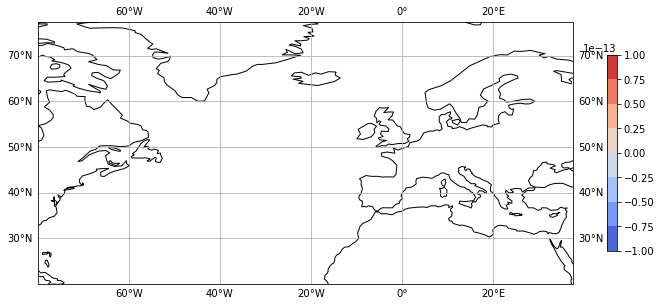

In [15]:
# # Attempt to plot the data
fnc.plot_obs_data(obs)

In [16]:
print(type(variable_data))

<class 'dict'>


extracting data for model: CESM1-1-CAM5-CMIP5
trying to print values for each member for debugging
values for model: CESM1-1-CAM5-CMIP5
values for members: <xarray.DataArray 'psl' (time: 58, lat: 24, lon: 48)>
dask.array<open_dataset-cfe951d2ea421739b74f10fd13c9ed82psl, shape=(58, 24, 48), dtype=float32, chunksize=(50, 24, 48), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1965-07-31 00:00:00 ... 2022-07-31 00:00:00
  * lon      (lon) float64 -80.0 -77.5 -75.0 -72.5 -70.0 ... 30.0 32.5 35.0 37.5
  * lat      (lat) float64 20.0 22.5 25.0 27.5 30.0 ... 67.5 70.0 72.5 75.0 77.5
Attributes:
    standard_name:  air_pressure_at_mean_sea_level
    long_name:      Sea Level Pressure
    units:          Pa
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    comment:        PSL
    description:    not, in general, the same as surface pressure
    frequency:      mon
    id:             psl
    mipTable:       Amon
    out_name:       psl
    prov:     

/home/users/benhutch/skill-maps/python/functions.py:807: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})


model values [[ 0.06641015  0.06624804  0.06282617 ...  0.0672832   0.03443555
   0.03833008]
 [ 0.0793457   0.0772832   0.07424609 ...  0.08001562  0.0543418
   0.05390234]
 [ 0.0940918   0.0890625   0.08456836 ...  0.09302149  0.07410938
   0.06202929]
 ...
 [-0.09451563 -0.10532031 -0.087375   ...  0.16166797  0.24347071
   0.30261526]
 [-0.11145312 -0.06955859 -0.05245508 ...  0.23398438  0.2808418
   0.31567967]
 [-0.17091015 -0.13099024 -0.09261328 ...  0.17043945  0.20328319
   0.2323496 ]]
obs values [[-0.27666016 -0.23927734 -0.21033203 ...  0.42669922  0.36408203
   0.31853516]
 [-0.39353516 -0.36693359 -0.29970703 ...  0.41181641  0.34197266
   0.31970703]
 [-0.46982422 -0.41634766 -0.34240234 ...  0.35884766  0.35603516
   0.30111328]
 ...
 [-0.12033203 -0.21744141 -0.18384766 ...  1.32158203  1.28173828
   1.21599609]
 [-0.26658203 -0.25607422 -0.12654297 ...  1.43470703  1.40267578
   1.31982422]
 [-0.29271484 -0.25298828 -0.25091797 ...  1.21142578  1.15353516
   1.08353

IndexError: index 55 is out of bounds for axis 0 with size 55

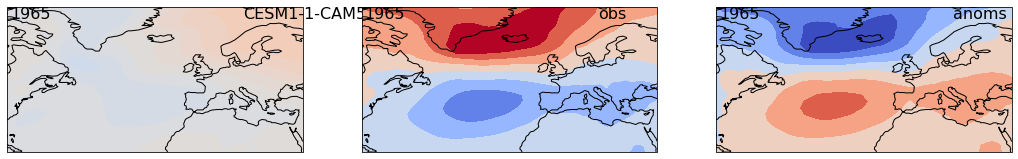

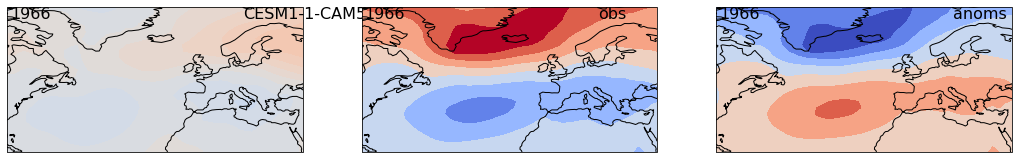

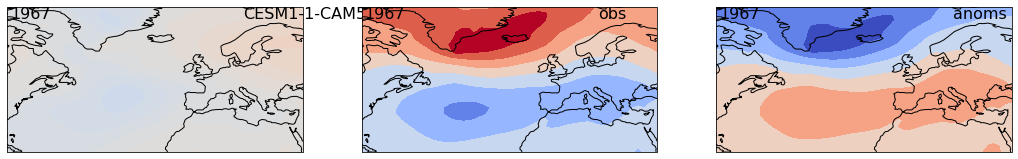

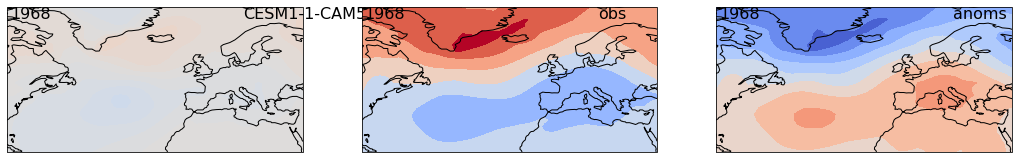

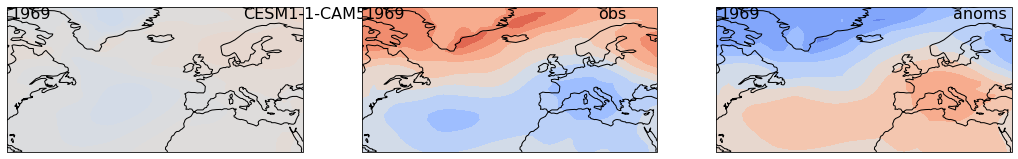

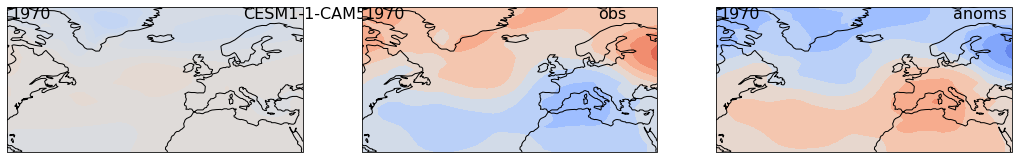

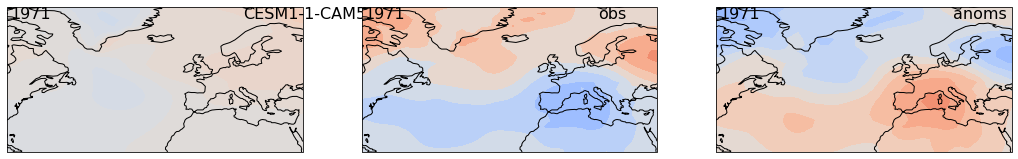

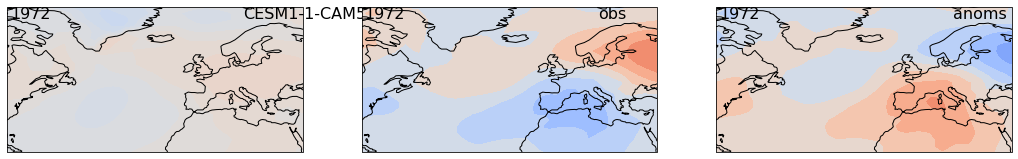

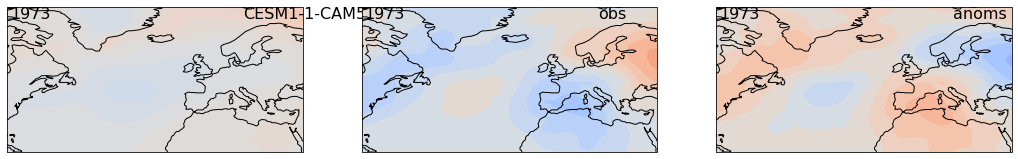

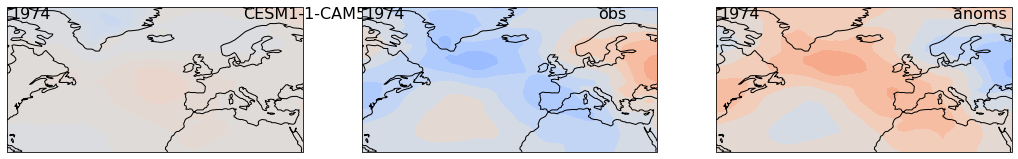

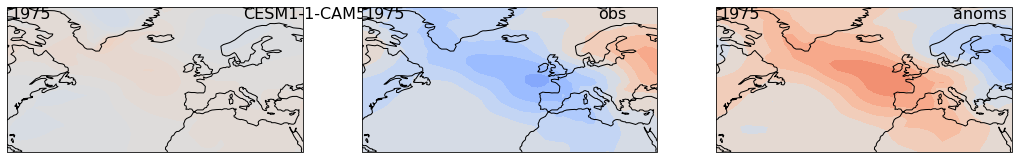

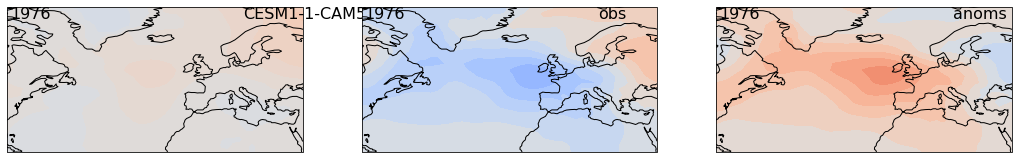

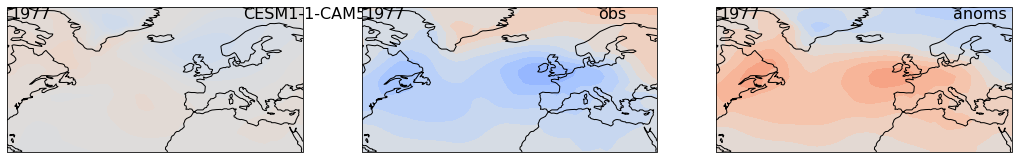

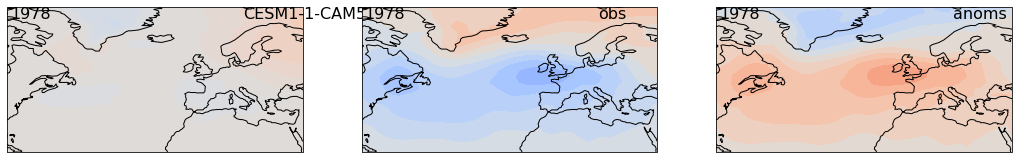

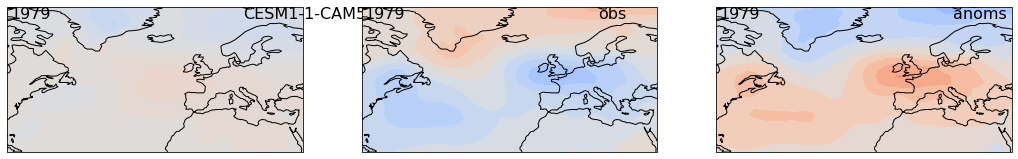

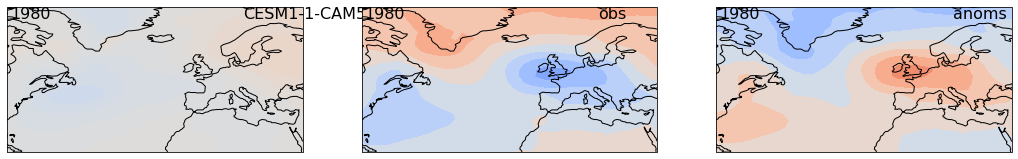

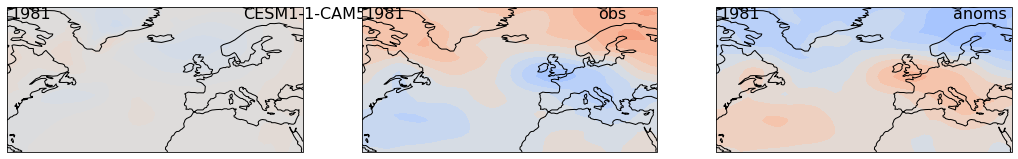

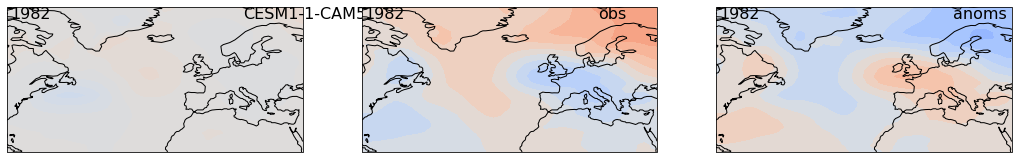

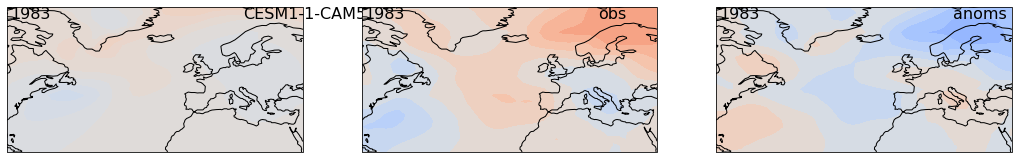

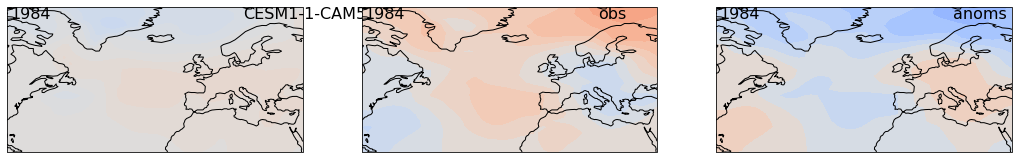

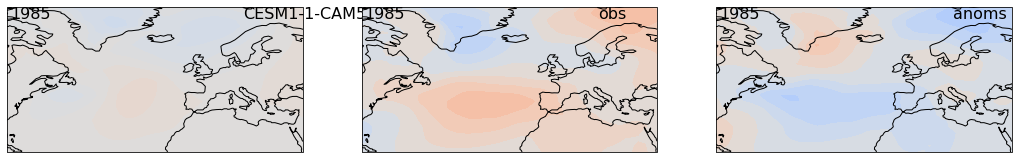

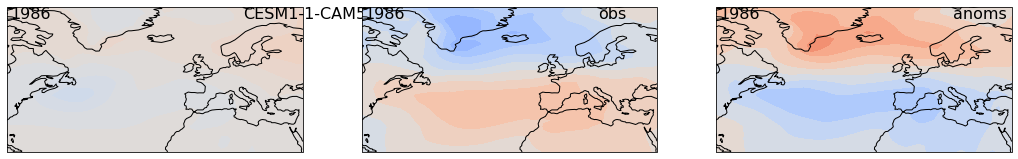

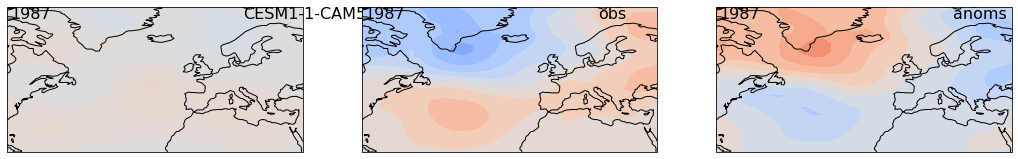

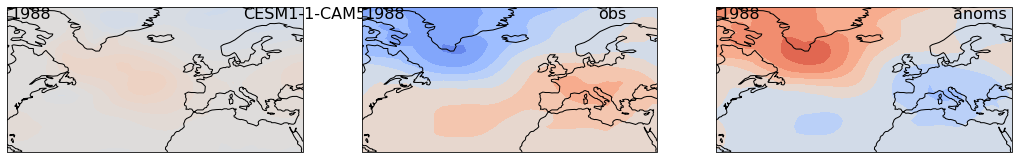

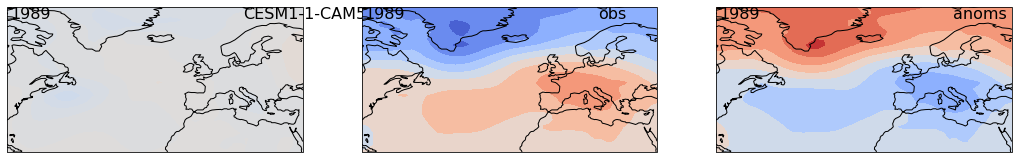

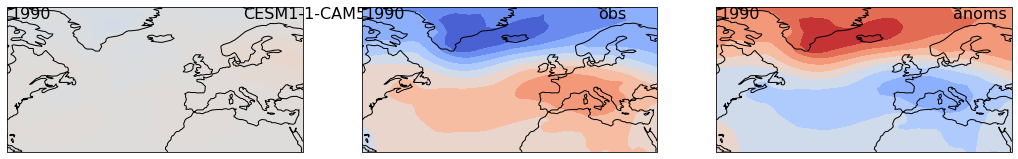

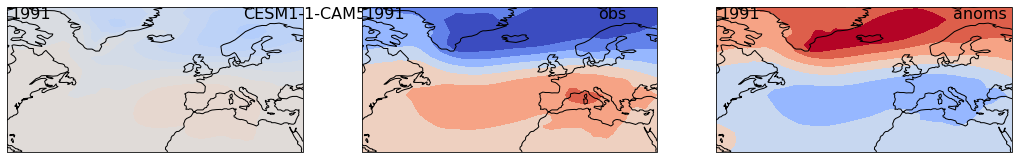

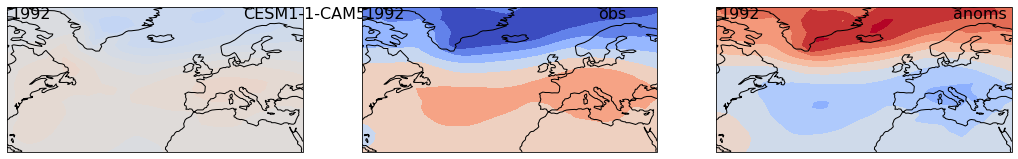

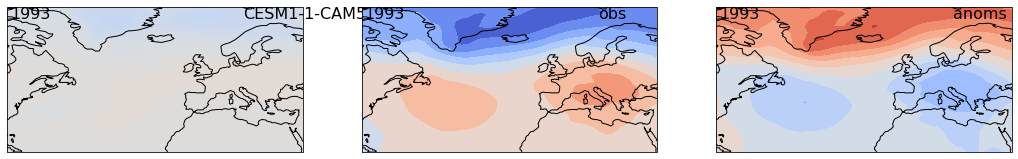

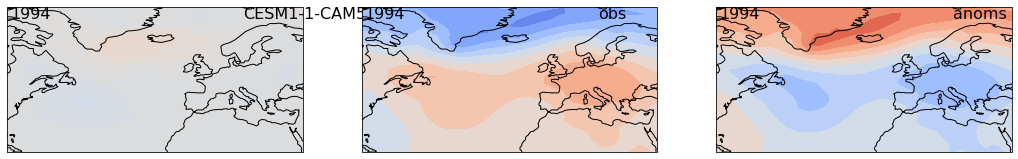

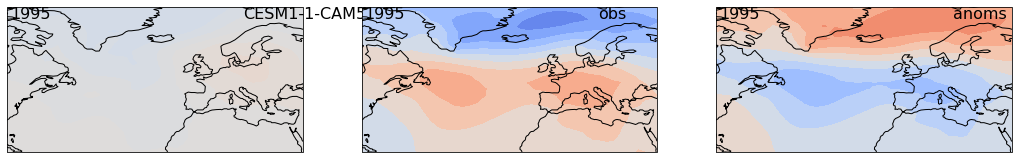

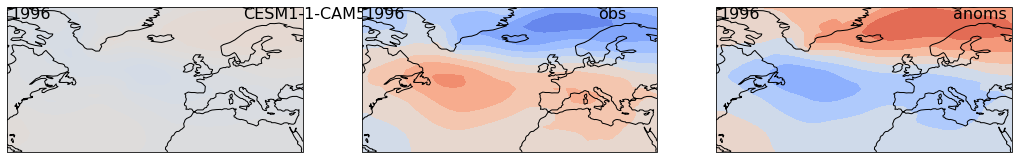

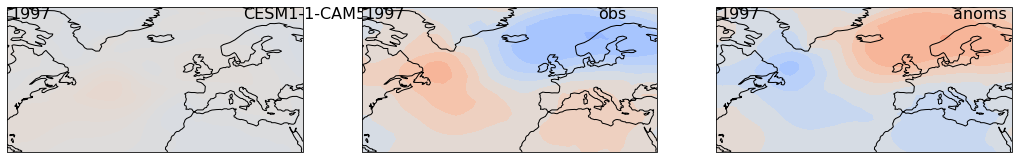

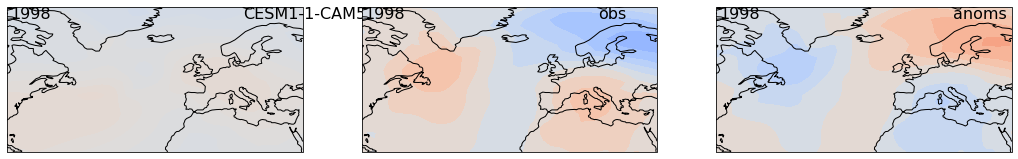

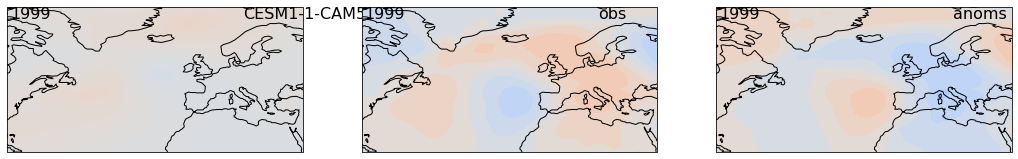

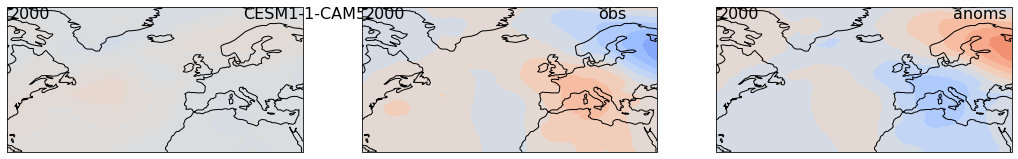

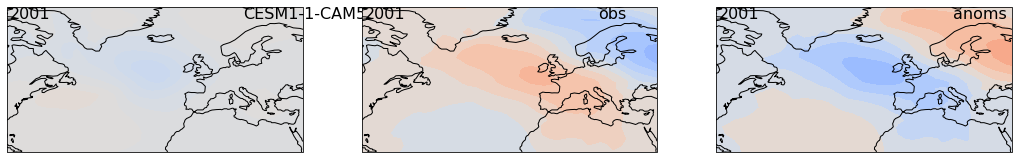

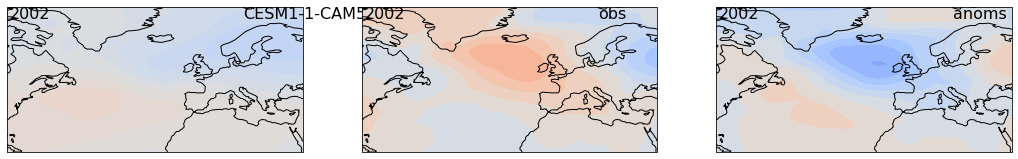

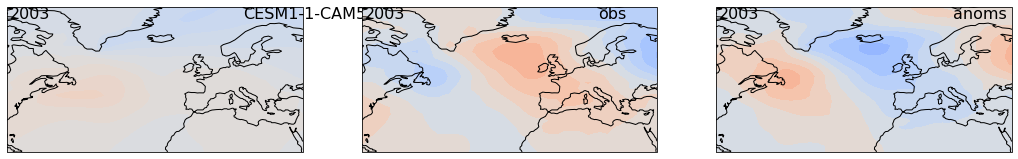

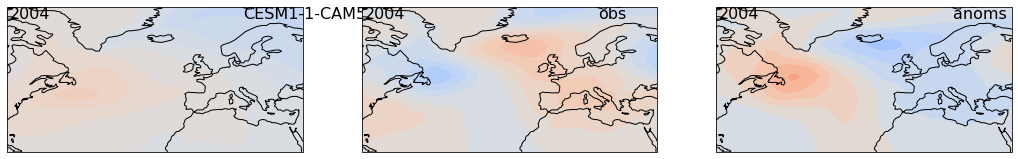

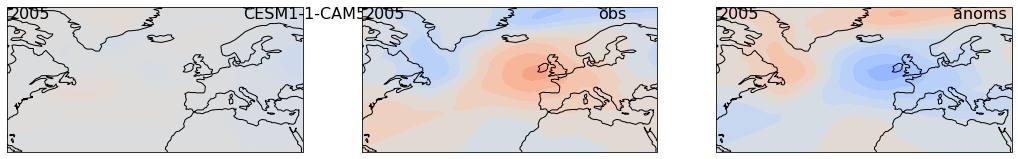

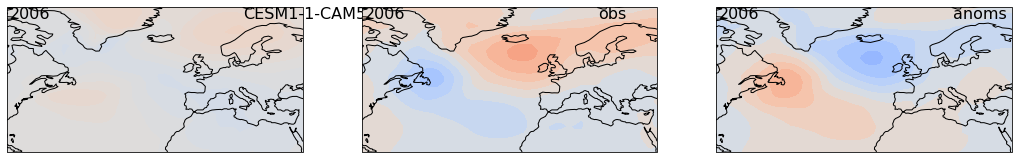

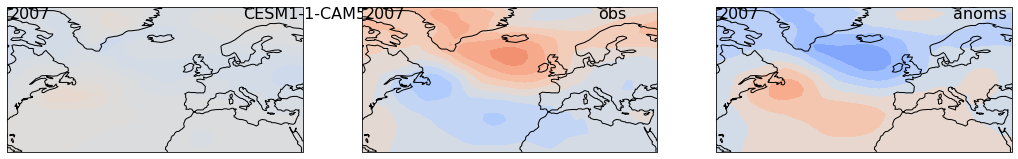

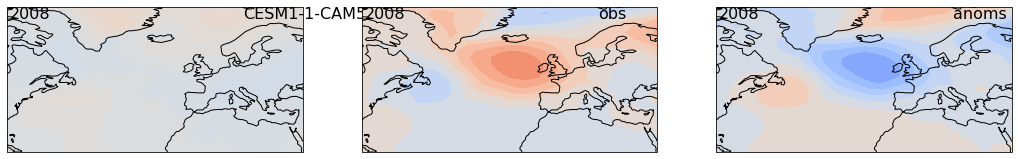

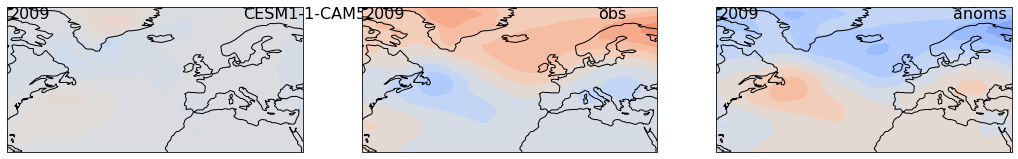

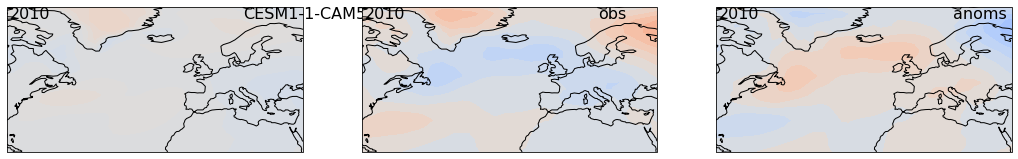

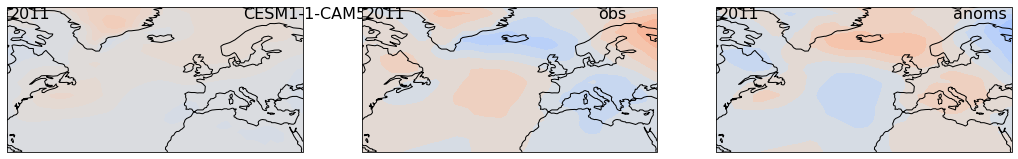

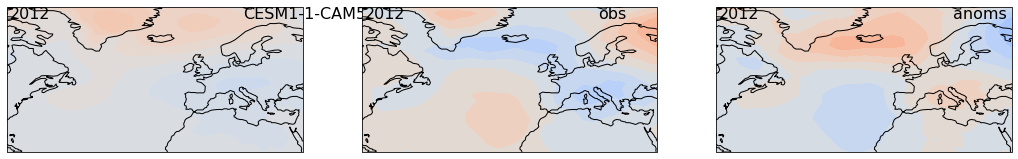

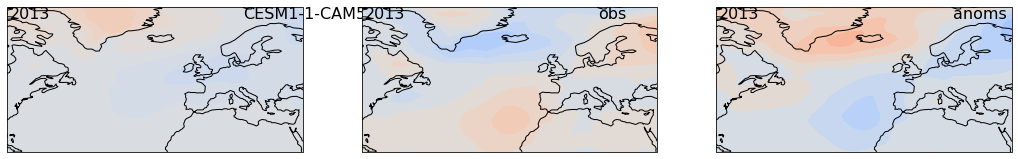

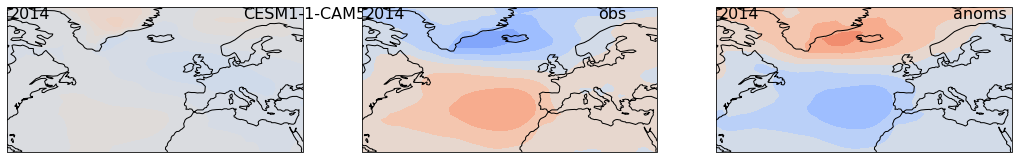

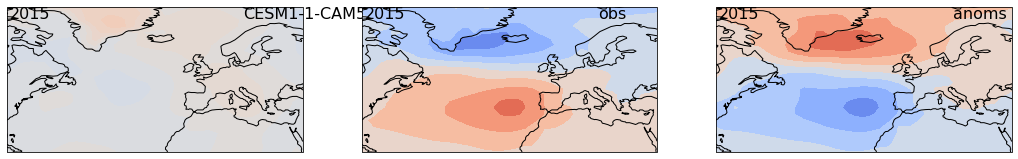

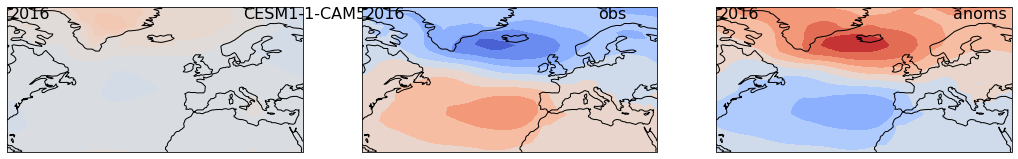

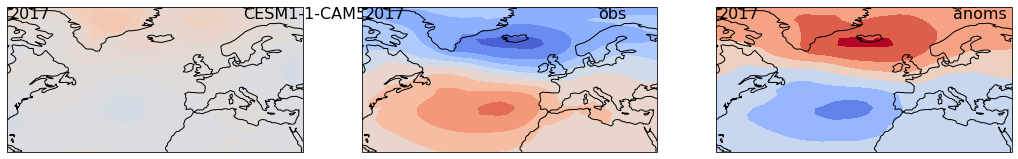

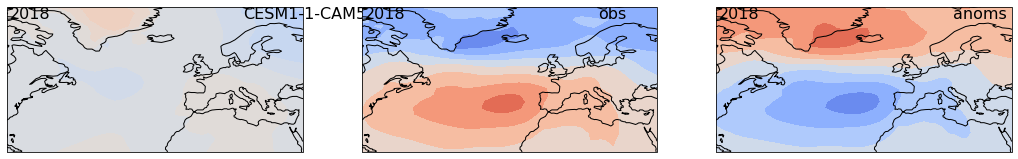

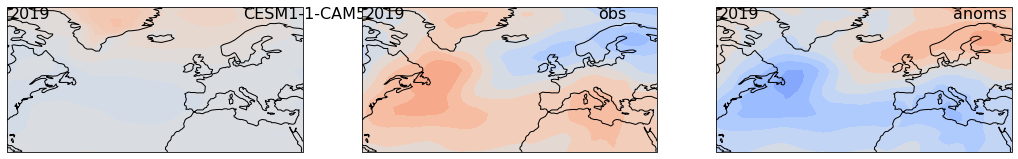

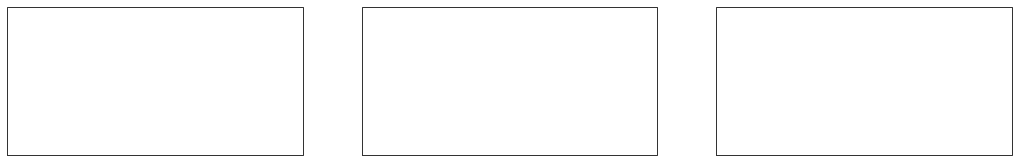

In [17]:
fnc.plot_model_data(variable_data, obs, dic.models, dic.gif_plots_dir)

In [18]:
# print((np.shape(variable_data['NorCPM1'])))

In [19]:
obs

<xarray.Dataset>
Dimensions:  (time: 63, lon: 48, lat: 24)
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2022-12-31
  * lon      (lon) float64 -80.0 -77.5 -75.0 -72.5 -70.0 ... 30.0 32.5 35.0 37.5
  * lat      (lat) float64 20.0 22.5 25.0 27.5 30.0 ... 67.5 70.0 72.5 75.0 77.5
Data variables:
    var151   (time, lat, lon) float64 dask.array<chunksize=(8, 24, 48), meta=np.ndarray>

In [20]:
print(type(dic.test_model_norcpm))

<class 'list'>


In [21]:
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(obs, variable_data, dic.test_model_cesm)

extracting data for model: CESM1-1-CAM5-CMIP5
trying to print values for each member for debugging
values for model: CESM1-1-CAM5-CMIP5
values for members: <xarray.DataArray 'psl' (time: 58, lat: 24, lon: 48)>
dask.array<open_dataset-cfe951d2ea421739b74f10fd13c9ed82psl, shape=(58, 24, 48), dtype=float32, chunksize=(50, 24, 48), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1965-07-31 00:00:00 ... 2022-07-31 00:00:00
  * lon      (lon) float64 -80.0 -77.5 -75.0 -72.5 -70.0 ... 30.0 32.5 35.0 37.5
  * lat      (lat) float64 20.0 22.5 25.0 27.5 30.0 ... 67.5 70.0 72.5 75.0 77.5
Attributes:
    standard_name:  air_pressure_at_mean_sea_level
    long_name:      Sea Level Pressure
    units:          Pa
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    comment:        PSL
    description:    not, in general, the same as surface pressure
    frequency:      mon
    id:             psl
    mipTable:       Amon
    out_name:       psl
    prov:     

[[ 0.18209241  0.17621702  0.21515635 ... -0.20163137 -0.18210996
  -0.24678735]
 [ 0.05527623  0.09620514  0.11068923 ... -0.20878411 -0.23282396
  -0.26025078]
 [ 0.00560642  0.04473789  0.08190385 ... -0.25922539 -0.28178517
  -0.34226821]
 ...
 [ 0.09722976  0.09515059  0.06522425 ...  0.52344822  0.50635392
   0.49140009]
 [ 0.00905727  0.0554842   0.08218275 ...  0.59212347  0.57968604
   0.57107066]
 [-0.02865192 -0.06120336  0.01005976 ...  0.63163194  0.63127836
   0.63014508]]


(array([[0., 0., 0., 0., 2., 3., 1., 2., 5., 1., 2., 1., 1., 2., 4., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 2., 3., 0., 3., 1., 3., 5., 2., 0., 3., 2., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 3., 1., 2., 1., 0., 2., 6., 4., 2., 1., 2., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 2., 0., 3., 1., 0., 2., 0., 6., 2., 3., 3., 2., 0.,
         0., 0., 0., 0.],
        [0., 1., 0., 1., 2., 1., 0., 1., 1., 2., 1., 5., 4., 2., 2., 1.,
         0., 0., 0., 0.],
        [1., 0., 0., 1., 1., 2., 0., 2., 0., 1., 3., 4., 3., 2., 3., 1.,
         0., 0., 0., 0.],
        [1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 5., 2., 1., 3., 3., 2.,
         0., 0., 0., 0.],
        [1., 1., 0., 1., 1., 1., 0., 1., 0., 6., 2., 2., 0., 3., 3., 1.,
         0., 1., 0., 0.],
        [1., 0., 1., 1., 1., 1., 1., 0., 3., 3., 4., 0., 0., 1., 4., 1.,
         1., 0., 1., 0.],
        [0., 0., 2., 1., 2., 0., 2., 2., 1., 3., 3., 0., 1., 0., 3., 1.,
         1., 1., 1., 0.],
        [0

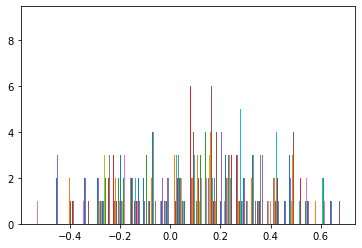

In [22]:
# print the rfield
print(rfield)
# visualise the distribution of r values
# as a histogram
plt.hist(rfield, bins=20)

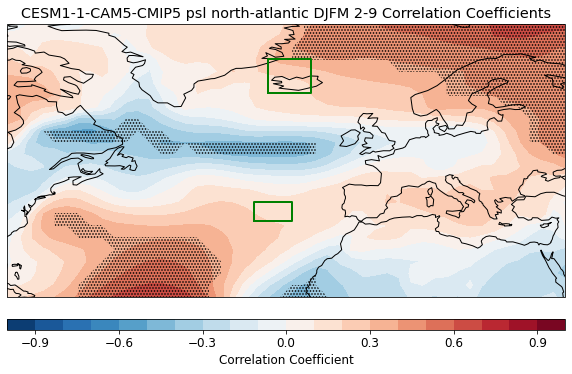

In [23]:
# # Call the function to plot the spatial correlations of these
fnc.plot_correlations(dic.test_model_cesm, rfield, pfield, obs, variable, region, season, forecast_range, dic.plots_dir, obs_lons_converted, lons_converted, dic.azores_grid, dic.iceland_grid)

Processing model: BCC-CSM2-MR


KeyError: 'BCC-CSM2-MR'

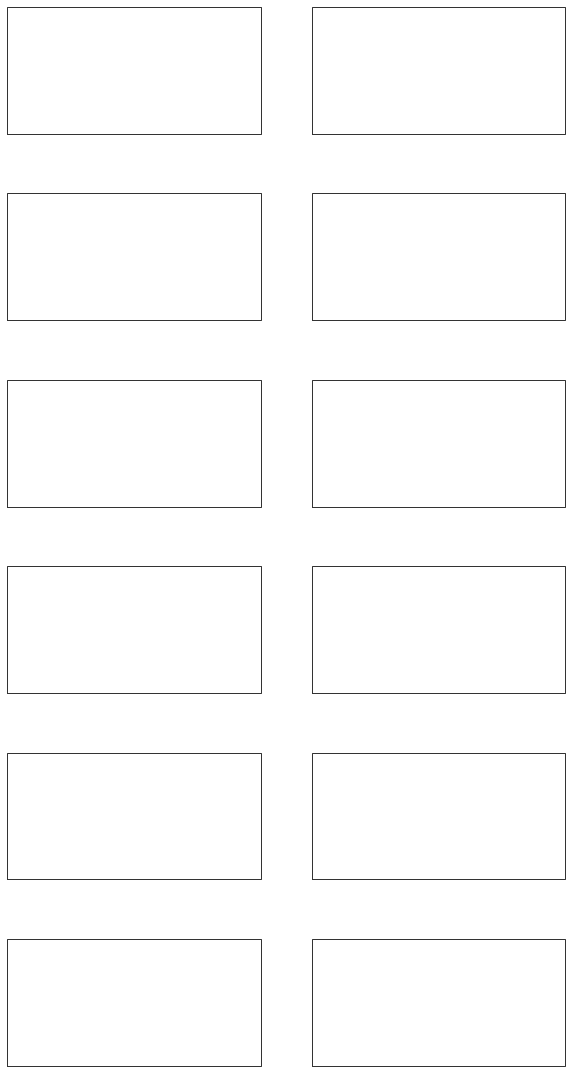

In [19]:
# Test the new function which plots the spatial correlations as subplots
# For all of the models
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, season, forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid)